# Personal Google Maps Timeline Analysis

Throughout the notebook, I will explain my data cleaning decisions and steps taken behind the visualization [Timeline of My Life](https://public.tableau.com/app/profile/alfred.mastan/viz/PersonalMapsTimeline/TimelineofMyLife) on Tableau. The data are taken from my personal **Google Maps Timeline** data from early 2017 until 2025 (now).

In [80]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

## Data Sourcing

The data is stored as JSON file containing multiple parts. I will only be using the **semantic** data which is the main data where all the trips are stored.

In [81]:
with open("Timeline.json") as file:
    data = json.load(file)
    print(data.keys())

semantic_df = pd.json_normalize(data["semanticSegments"])
semantic_df.head()

dict_keys(['semanticSegments', 'rawSignals', 'userLocationProfile'])


,startTime,endTime,timelinePath,startTimeTimezoneUtcOffsetMinutes,endTimeTimezoneUtcOffsetMinutes,activity.start.latLng,activity.end.latLng,activity.distanceMeters,activity.topCandidate.type,activity.topCandidate.probability,...,visit.topCandidate.placeId,visit.topCandidate.semanticType,visit.topCandidate.probability,visit.topCandidate.placeLocation.latLng,timelineMemory.trip.distanceFromOriginKms,timelineMemory.trip.destinations,activity.probability,activity.parking.location.latLng,activity.parking.startTime,visit.isTimelessVisit
0,2017-06-10T03:00:00.000-07:00,2017-06-10T05:00:00.000-07:00,"[{'point': '-6.2707362°, 107.1132758°', 'time'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-06-10T04:16:11.000-07:00,2017-06-10T06:06:15.000-07:00,NaN,420.0,420.0,"-6.2707362°, 107.1132758°","-6.1828185°, 106.9299468°",27433.0,IN_PASSENGER_VEHICLE,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-06-10T05:00:00.000-07:00,2017-06-10T07:00:00.000-07:00,"[{'point': '-6.2532237°, 107.0106302°', 'time'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-06-10T06:23:45.000-07:00,2017-06-10T07:41:04.000-07:00,NaN,420.0,420.0,"-6.1827621°, 106.9289805°","-6.1816063°, 106.9091934°",2191.0,IN_PASSENGER_VEHICLE,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-06-10T07:53:45.000-07:00,2017-06-10T08:34:06.000-07:00,NaN,420.0,420.0,"-6.1816032°, 106.9091399°","-6.1813338°, 106.90453°",510.0,MOTORCYCLING,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning

### Dropping Unecessary Columns

Some of the data will not used as they are unrelated or already existed in another column/feature

In [82]:
semantic_df.drop(["startTimeTimezoneUtcOffsetMinutes", "endTimeTimezoneUtcOffsetMinutes", "timelineMemory.trip.distanceFromOriginKms", "timelineMemory.trip.destinations", "activity.probability", 
                  "activity.parking.location.latLng", "activity.parking.startTime", "visit.isTimelessVisit", "activity.topCandidate.probability", "visit.hierarchyLevel", "visit.probability",
                  "visit.topCandidate.probability", "visit.topCandidate.placeLocation.latLng"], axis=1, inplace=True)
semantic_df

,startTime,endTime,timelinePath,activity.start.latLng,activity.end.latLng,activity.distanceMeters,activity.topCandidate.type,visit.topCandidate.placeId,visit.topCandidate.semanticType
0,2017-06-10T03:00:00.000-07:00,2017-06-10T05:00:00.000-07:00,"[{'point': '-6.2707362°, 107.1132758°', 'time'...",NaN,NaN,NaN,NaN,NaN,NaN
1,2017-06-10T04:16:11.000-07:00,2017-06-10T06:06:15.000-07:00,NaN,"-6.2707362°, 107.1132758°","-6.1828185°, 106.9299468°",27433.000000,IN_PASSENGER_VEHICLE,NaN,NaN
2,2017-06-10T05:00:00.000-07:00,2017-06-10T07:00:00.000-07:00,"[{'point': '-6.2532237°, 107.0106302°', 'time'...",NaN,NaN,NaN,NaN,NaN,NaN
3,2017-06-10T06:23:45.000-07:00,2017-06-10T07:41:04.000-07:00,NaN,"-6.1827621°, 106.9289805°","-6.1816063°, 106.9091934°",2191.000000,IN_PASSENGER_VEHICLE,NaN,NaN
4,2017-06-10T07:53:45.000-07:00,2017-06-10T08:34:06.000-07:00,NaN,"-6.1816032°, 106.9091399°","-6.1813338°, 106.90453°",510.000000,MOTORCYCLING,NaN,NaN
...,...,...,...,...,...,...,...,...,...
13426,2025-04-10T16:00:00.000-07:00,2025-04-10T18:00:00.000-07:00,"[{'point': '34.0711789°, -118.4421703°', 'time...",NaN,NaN,NaN,NaN,NaN,NaN
13427,2025-04-10T17:05:11.000-07:00,2025-04-10T17:30:14.000-07:00,NaN,"34.0711789°, -118.4421703°","34.0484489°, -118.4539038°",3521.548828,CYCLING,NaN,NaN
13428,2025-04-10T17:30:14.000-07:00,2025-04-11T08:07:19.000-07:00,NaN,NaN,NaN,NaN,NaN,ChIJLWpdAWW7woAR3FqElBFsWds,HOME
13429,2025-04-10T18:00:00.000-07:00,2025-04-10T20:00:00.000-07:00,"[{'point': '34.0484973°, -118.4538101°', 'time...",NaN,NaN,NaN,NaN,NaN,NaN


### Stops

Extracting the number of stops from `timelinePath` which consists of points and its respective time. However, this is sometimes innacurate and consist a lot of missing data.

In [ ]:
stops_df = pd.DataFrame(semantic_df["timelinePath"].explode())
stops_df = stops_df.groupby(level=0).count() # Count the number of points by index
semantic_df["Stops"] = stops_df
semantic_df

,startTime,endTime,timelinePath,activity.start.latLng,activity.end.latLng,activity.distanceMeters,activity.topCandidate.type,visit.topCandidate.placeId,visit.topCandidate.semanticType,Stops
0,2017-06-10T03:00:00.000-07:00,2017-06-10T05:00:00.000-07:00,"[{'point': '-6.2707362°, 107.1132758°', 'time'...",NaN,NaN,NaN,NaN,NaN,NaN,6
1,2017-06-10T04:16:11.000-07:00,2017-06-10T06:06:15.000-07:00,NaN,"-6.2707362°, 107.1132758°","-6.1828185°, 106.9299468°",27433.000000,IN_PASSENGER_VEHICLE,NaN,NaN,0
2,2017-06-10T05:00:00.000-07:00,2017-06-10T07:00:00.000-07:00,"[{'point': '-6.2532237°, 107.0106302°', 'time'...",NaN,NaN,NaN,NaN,NaN,NaN,19
3,2017-06-10T06:23:45.000-07:00,2017-06-10T07:41:04.000-07:00,NaN,"-6.1827621°, 106.9289805°","-6.1816063°, 106.9091934°",2191.000000,IN_PASSENGER_VEHICLE,NaN,NaN,0
4,2017-06-10T07:53:45.000-07:00,2017-06-10T08:34:06.000-07:00,NaN,"-6.1816032°, 106.9091399°","-6.1813338°, 106.90453°",510.000000,MOTORCYCLING,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...
13426,2025-04-10T16:00:00.000-07:00,2025-04-10T18:00:00.000-07:00,"[{'point': '34.0711789°, -118.4421703°', 'time...",NaN,NaN,NaN,NaN,NaN,NaN,12
13427,2025-04-10T17:05:11.000-07:00,2025-04-10T17:30:14.000-07:00,NaN,"34.0711789°, -118.4421703°","34.0484489°, -118.4539038°",3521.548828,CYCLING,NaN,NaN,0
13428,2025-04-10T17:30:14.000-07:00,2025-04-11T08:07:19.000-07:00,NaN,NaN,NaN,NaN,NaN,ChIJLWpdAWW7woAR3FqElBFsWds,HOME,0
13429,2025-04-10T18:00:00.000-07:00,2025-04-10T20:00:00.000-07:00,"[{'point': '34.0484973°, -118.4538101°', 'time...",NaN,NaN,NaN,NaN,NaN,NaN,25


### Timestamps

The dates are mainly taken from `startTime` and `endTime`, where I extract the trip duration and the start date of the trip. I ignored the end date as it will be represented by the trip duration.

In [ ]:
semantic_df["startTime"] = pd.to_datetime(semantic_df["startTime"], utc=True, format="ISO8601") # Convert to UTC +00:00
semantic_df["endTime"] = pd.to_datetime(semantic_df["endTime"], utc=True, format="ISO8601")
semantic_df["Trip Duration (h)"] = round((semantic_df["endTime"] - semantic_df["startTime"]) / np.timedelta64(1, "h"), 2) # Calculate the time difference and convert to hours
semantic_df["Date"] = pd.to_datetime(semantic_df["startTime"].apply(lambda x: x.strftime("%Y-%m-%d"))) # Change formatting
semantic_df

,startTime,endTime,timelinePath,activity.start.latLng,activity.end.latLng,activity.distanceMeters,activity.topCandidate.type,visit.topCandidate.placeId,visit.topCandidate.semanticType,Stops,Trip Duration (h),Date
0,2017-06-10 10:00:00+00:00,2017-06-10 12:00:00+00:00,"[{'point': '-6.2707362°, 107.1132758°', 'time'...",NaN,NaN,NaN,NaN,NaN,NaN,6,2.00,2017-06-10
1,2017-06-10 11:16:11+00:00,2017-06-10 13:06:15+00:00,NaN,"-6.2707362°, 107.1132758°","-6.1828185°, 106.9299468°",27433.000000,IN_PASSENGER_VEHICLE,NaN,NaN,0,1.83,2017-06-10
2,2017-06-10 12:00:00+00:00,2017-06-10 14:00:00+00:00,"[{'point': '-6.2532237°, 107.0106302°', 'time'...",NaN,NaN,NaN,NaN,NaN,NaN,19,2.00,2017-06-10
3,2017-06-10 13:23:45+00:00,2017-06-10 14:41:04+00:00,NaN,"-6.1827621°, 106.9289805°","-6.1816063°, 106.9091934°",2191.000000,IN_PASSENGER_VEHICLE,NaN,NaN,0,1.29,2017-06-10
4,2017-06-10 14:53:45+00:00,2017-06-10 15:34:06+00:00,NaN,"-6.1816032°, 106.9091399°","-6.1813338°, 106.90453°",510.000000,MOTORCYCLING,NaN,NaN,0,0.67,2017-06-10
...,...,...,...,...,...,...,...,...,...,...,...,...
13426,2025-04-10 23:00:00+00:00,2025-04-11 01:00:00+00:00,"[{'point': '34.0711789°, -118.4421703°', 'time...",NaN,NaN,NaN,NaN,NaN,NaN,12,2.00,2025-04-10
13427,2025-04-11 00:05:11+00:00,2025-04-11 00:30:14+00:00,NaN,"34.0711789°, -118.4421703°","34.0484489°, -118.4539038°",3521.548828,CYCLING,NaN,NaN,0,0.42,2025-04-11
13428,2025-04-11 00:30:14+00:00,2025-04-11 15:07:19+00:00,NaN,NaN,NaN,NaN,NaN,ChIJLWpdAWW7woAR3FqElBFsWds,HOME,0,14.62,2025-04-11
13429,2025-04-11 01:00:00+00:00,2025-04-11 03:00:00+00:00,"[{'point': '34.0484973°, -118.4538101°', 'time...",NaN,NaN,NaN,NaN,NaN,NaN,25,2.00,2025-04-11


The data consists a lot of missing dates throughout the years, especially the data before 2022. To have a smooth graph, I decided to deal this by adding those dates seperately. To ensure there are minimal bias, I kept the stops and trip duration empty. This prevents bias in the average and sum calculations compared to filling it with zeros. 

In [ ]:
# Fill in missing dates to ensure consistency
extra_dates_df = pd.DataFrame()
for i in semantic_df[semantic_df["Date"].diff().dt.days > 1].index:
    days_diff = semantic_df["Date"].diff().dt.days.iloc[i] # Get how many days are missing between rows
    add_df = pd.date_range(start=semantic_df["Date"].iloc[i-1] + pd.DateOffset(days=1), periods=int(days_diff-1)) # Create a row for each day(s) that are missing
    extra_dates_df = pd.concat([extra_dates_df, pd.DataFrame(add_df)], ignore_index=True) # Store them in a seperate DataFrame

extra_dates_df.rename({0: "Date"}, axis=1, inplace=True)
semantic_df = pd.concat([semantic_df, extra_dates_df], ignore_index=True) # Combine with main data
semantic_df.sort_values(["Date"], inplace=True) 
semantic_df


,startTime,endTime,timelinePath,activity.start.latLng,activity.end.latLng,activity.distanceMeters,activity.topCandidate.type,visit.topCandidate.placeId,visit.topCandidate.semanticType,Stops,Trip Duration (h),Date
0,2017-06-10 10:00:00+00:00,2017-06-10 12:00:00+00:00,"[{'point': '-6.2707362°, 107.1132758°', 'time'...",NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.00,2017-06-10
9,2017-06-10 22:19:23+00:00,2017-06-11 01:02:27+00:00,NaN,"-6.1798369°, 106.8789247°","-6.1792943°, 106.8696481°",2054.000000,IN_PASSENGER_VEHICLE,NaN,NaN,0.0,2.72,2017-06-10
7,2017-06-10 17:27:59+00:00,2017-06-10 17:43:38+00:00,NaN,"-6.1804955°, 106.8901867°","-6.1803813°, 106.8882343°",216.000000,IN_PASSENGER_VEHICLE,NaN,NaN,0.0,0.26,2017-06-10
6,2017-06-10 16:48:07+00:00,2017-06-10 17:12:19+00:00,NaN,"-6.1807332°, 106.8942526°","-6.1804955°, 106.8901867°",450.000000,IN_PASSENGER_VEHICLE,NaN,NaN,0.0,0.40,2017-06-10
5,2017-06-10 15:38:22+00:00,2017-06-10 16:27:57+00:00,NaN,"-6.1812978°, 106.9039137°","-6.1808378°, 106.8960429°",871.000000,IN_PASSENGER_VEHICLE,NaN,NaN,0.0,0.83,2017-06-10
...,...,...,...,...,...,...,...,...,...,...,...,...
13419,2025-04-10 19:00:00+00:00,2025-04-10 21:00:00+00:00,"[{'point': '34.0484394°, -118.4538126°', 'time...",NaN,NaN,NaN,NaN,NaN,NaN,8.0,2.00,2025-04-10
13430,2025-04-11 03:00:00+00:00,2025-04-11 05:00:00+00:00,"[{'point': '34.0483813°, -118.4538508°', 'time...",NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.00,2025-04-11
13427,2025-04-11 00:05:11+00:00,2025-04-11 00:30:14+00:00,NaN,"34.0711789°, -118.4421703°","34.0484489°, -118.4539038°",3521.548828,CYCLING,NaN,NaN,0.0,0.42,2025-04-11
13428,2025-04-11 00:30:14+00:00,2025-04-11 15:07:19+00:00,NaN,NaN,NaN,NaN,NaN,ChIJLWpdAWW7woAR3FqElBFsWds,HOME,0.0,14.62,2025-04-11


### Start and End Latitude and Longitude

Some of the start and end latitude and longitude are missing, but available on the timeline path. To ensure minimal data loss, I take both of the earliest and latest latitude and longitude from `timelinePath` and combine it with the activity data.

In [86]:
start_activity_df = semantic_df["activity.start.latLng"].apply(lambda x: pd.Series([float(i.strip("°")) for i in str(x).split(",")]  if type(x) == str else x))
end_activity_df = semantic_df["activity.end.latLng"].apply(lambda x: pd.Series([float(i.strip("°")) for i in str(x).split(",")] if type(x) == str else x))

start_activity_df

,0,1
0,NaN,NaN
9,-6.179837,106.878925
7,-6.180496,106.890187
6,-6.180733,106.894253
5,-6.181298,106.903914
...,...,...
13419,NaN,NaN
13430,NaN,NaN
13427,34.071179,-118.442170
13428,NaN,NaN


In [87]:
raw_timelinePath_df = semantic_df["timelinePath"].explode().apply(lambda x: pd.Series(x)) 
cleaned_timelinePath_df = raw_timelinePath_df["point"].apply(lambda x: pd.Series([float(i.strip("°")) for i in str(x).split(",")] if type(x) == str else x))

cleaned_timelinePath_df

,0,1
0,-6.270736,107.113276
0,-6.272596,107.108092
0,-6.274047,107.099381
0,-6.271204,107.091338
0,-6.249689,107.024654
...,...,...
13429,34.048472,-118.453805
13429,34.048462,-118.453868
13429,34.048503,-118.453833
13429,34.048489,-118.453904


In [88]:
# Data points are already sorted by its time, so we can take first and last row to get the start and end point
start_timelinePath_df = cleaned_timelinePath_df.groupby(level=0).apply(lambda x: x.iloc[0]).reset_index(drop=True)
end_timelinePath_df = cleaned_timelinePath_df.groupby(level=0).apply(lambda x: x.iloc[-1]).reset_index(drop=True)

# Combines start lat, long from activity and timeline path to fill in NaN
start_latlng_df = start_timelinePath_df.fillna(start_activity_df)
semantic_df["Start Lat"] = start_latlng_df[0]
semantic_df["Start Long"] = start_latlng_df[1]

end_latlng_df = end_timelinePath_df.fillna(end_activity_df)
semantic_df["End Lat"] = end_latlng_df[0]
semantic_df["End Long"] = end_latlng_df[1]

semantic_df

,startTime,endTime,timelinePath,activity.start.latLng,activity.end.latLng,activity.distanceMeters,activity.topCandidate.type,visit.topCandidate.placeId,visit.topCandidate.semanticType,Stops,Trip Duration (h),Date,Start Lat,Start Long,End Lat,End Long
0,2017-06-10 10:00:00+00:00,2017-06-10 12:00:00+00:00,"[{'point': '-6.2707362°, 107.1132758°', 'time'...",NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.00,2017-06-10,-6.270736,107.113276,-6.247948,107.019615
9,2017-06-10 22:19:23+00:00,2017-06-11 01:02:27+00:00,NaN,"-6.1798369°, 106.8789247°","-6.1792943°, 106.8696481°",2054.000000,IN_PASSENGER_VEHICLE,NaN,NaN,0.0,2.72,2017-06-10,-6.179837,106.878925,-6.179294,106.869648
7,2017-06-10 17:27:59+00:00,2017-06-10 17:43:38+00:00,NaN,"-6.1804955°, 106.8901867°","-6.1803813°, 106.8882343°",216.000000,IN_PASSENGER_VEHICLE,NaN,NaN,0.0,0.26,2017-06-10,-6.180496,106.890187,-6.180381,106.888234
6,2017-06-10 16:48:07+00:00,2017-06-10 17:12:19+00:00,NaN,"-6.1807332°, 106.8942526°","-6.1804955°, 106.8901867°",450.000000,IN_PASSENGER_VEHICLE,NaN,NaN,0.0,0.40,2017-06-10,-6.180733,106.894253,-6.180496,106.890187
5,2017-06-10 15:38:22+00:00,2017-06-10 16:27:57+00:00,NaN,"-6.1812978°, 106.9039137°","-6.1808378°, 106.8960429°",871.000000,IN_PASSENGER_VEHICLE,NaN,NaN,0.0,0.83,2017-06-10,-6.181298,106.903914,-6.180838,106.896043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13419,2025-04-10 19:00:00+00:00,2025-04-10 21:00:00+00:00,"[{'point': '34.0484394°, -118.4538126°', 'time...",NaN,NaN,NaN,NaN,NaN,NaN,8.0,2.00,2025-04-10,34.048439,-118.453813,34.069361,-118.442454
13430,2025-04-11 03:00:00+00:00,2025-04-11 05:00:00+00:00,"[{'point': '34.0483813°, -118.4538508°', 'time...",NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.00,2025-04-11,34.048381,-118.453851,34.048499,-118.453841
13427,2025-04-11 00:05:11+00:00,2025-04-11 00:30:14+00:00,NaN,"34.0711789°, -118.4421703°","34.0484489°, -118.4539038°",3521.548828,CYCLING,NaN,NaN,0.0,0.42,2025-04-11,34.071179,-118.442170,34.048449,-118.453904
13428,2025-04-11 00:30:14+00:00,2025-04-11 15:07:19+00:00,NaN,NaN,NaN,NaN,NaN,ChIJLWpdAWW7woAR3FqElBFsWds,HOME,0.0,14.62,2025-04-11,NaN,NaN,NaN,NaN


For the missing data, I decided to backfill for the sake of extracting the location. The gaps previously filled was mostly short, so it is unlikely that I will be in another country/location within that period of time. Also, notice that the data provided `placeId` that are related to the Google Maps. One option is to use the Google Maps API to extract the location and fill in some of the missing location. However, it will take an additional cost to use their API which I don't think is worth it. Again, to prevent bias, I set the end location to be the exact same as the start.

In [89]:
# Could use the GoogleAPI to be more accurate, but to prevent additional cost, bfill/ffill works good enough as we only care about the country not specific place
# End Lat will be set to be the same as start to prevent inaccurate distance

semantic_df[["Start Lat", "Start Long"]] = semantic_df[["Start Lat", "Start Long"]].bfill()
semantic_df["End Lat"] = semantic_df["End Lat"].fillna(semantic_df["Start Lat"])
semantic_df["End Long"] = semantic_df["End Long"].fillna(semantic_df["Start Long"])
semantic_df

,startTime,endTime,timelinePath,activity.start.latLng,activity.end.latLng,activity.distanceMeters,activity.topCandidate.type,visit.topCandidate.placeId,visit.topCandidate.semanticType,Stops,Trip Duration (h),Date,Start Lat,Start Long,End Lat,End Long
0,2017-06-10 10:00:00+00:00,2017-06-10 12:00:00+00:00,"[{'point': '-6.2707362°, 107.1132758°', 'time'...",NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.00,2017-06-10,-6.270736,107.113276,-6.247948,107.019615
9,2017-06-10 22:19:23+00:00,2017-06-11 01:02:27+00:00,NaN,"-6.1798369°, 106.8789247°","-6.1792943°, 106.8696481°",2054.000000,IN_PASSENGER_VEHICLE,NaN,NaN,0.0,2.72,2017-06-10,-6.179837,106.878925,-6.179294,106.869648
7,2017-06-10 17:27:59+00:00,2017-06-10 17:43:38+00:00,NaN,"-6.1804955°, 106.8901867°","-6.1803813°, 106.8882343°",216.000000,IN_PASSENGER_VEHICLE,NaN,NaN,0.0,0.26,2017-06-10,-6.180496,106.890187,-6.180381,106.888234
6,2017-06-10 16:48:07+00:00,2017-06-10 17:12:19+00:00,NaN,"-6.1807332°, 106.8942526°","-6.1804955°, 106.8901867°",450.000000,IN_PASSENGER_VEHICLE,NaN,NaN,0.0,0.40,2017-06-10,-6.180733,106.894253,-6.180496,106.890187
5,2017-06-10 15:38:22+00:00,2017-06-10 16:27:57+00:00,NaN,"-6.1812978°, 106.9039137°","-6.1808378°, 106.8960429°",871.000000,IN_PASSENGER_VEHICLE,NaN,NaN,0.0,0.83,2017-06-10,-6.181298,106.903914,-6.180838,106.896043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13419,2025-04-10 19:00:00+00:00,2025-04-10 21:00:00+00:00,"[{'point': '34.0484394°, -118.4538126°', 'time...",NaN,NaN,NaN,NaN,NaN,NaN,8.0,2.00,2025-04-10,34.048439,-118.453813,34.069361,-118.442454
13430,2025-04-11 03:00:00+00:00,2025-04-11 05:00:00+00:00,"[{'point': '34.0483813°, -118.4538508°', 'time...",NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.00,2025-04-11,34.048381,-118.453851,34.048499,-118.453841
13427,2025-04-11 00:05:11+00:00,2025-04-11 00:30:14+00:00,NaN,"34.0711789°, -118.4421703°","34.0484489°, -118.4539038°",3521.548828,CYCLING,NaN,NaN,0.0,0.42,2025-04-11,34.071179,-118.442170,34.048449,-118.453904
13428,2025-04-11 00:30:14+00:00,2025-04-11 15:07:19+00:00,NaN,NaN,NaN,NaN,NaN,ChIJLWpdAWW7woAR3FqElBFsWds,HOME,0.0,14.62,2025-04-11,34.048497,-118.453810,34.048497,-118.453810


### Distance

The distance provided from the data are also missing quite a lot. To fill those out, I used the latitude and longitude with `distance` function from `geopy`, which I believe uses **geodesic** distance formula by default. This provides a good enough rough estimates of the distance I took from place to place.

In [90]:
semantic_df.rename({"activity.distanceMeters": "Distance (m)"}, axis=1, inplace=True)
semantic_df["Distance (m)"] = semantic_df["Distance (m)"].round(2)
semantic_df.reset_index(drop=True, inplace=True)
semantic_df

,startTime,endTime,timelinePath,activity.start.latLng,activity.end.latLng,Distance (m),activity.topCandidate.type,visit.topCandidate.placeId,visit.topCandidate.semanticType,Stops,Trip Duration (h),Date,Start Lat,Start Long,End Lat,End Long
0,2017-06-10 10:00:00+00:00,2017-06-10 12:00:00+00:00,"[{'point': '-6.2707362°, 107.1132758°', 'time'...",NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.00,2017-06-10,-6.270736,107.113276,-6.247948,107.019615
1,2017-06-10 22:19:23+00:00,2017-06-11 01:02:27+00:00,NaN,"-6.1798369°, 106.8789247°","-6.1792943°, 106.8696481°",2054.00,IN_PASSENGER_VEHICLE,NaN,NaN,0.0,2.72,2017-06-10,-6.179837,106.878925,-6.179294,106.869648
2,2017-06-10 17:27:59+00:00,2017-06-10 17:43:38+00:00,NaN,"-6.1804955°, 106.8901867°","-6.1803813°, 106.8882343°",216.00,IN_PASSENGER_VEHICLE,NaN,NaN,0.0,0.26,2017-06-10,-6.180496,106.890187,-6.180381,106.888234
3,2017-06-10 16:48:07+00:00,2017-06-10 17:12:19+00:00,NaN,"-6.1807332°, 106.8942526°","-6.1804955°, 106.8901867°",450.00,IN_PASSENGER_VEHICLE,NaN,NaN,0.0,0.40,2017-06-10,-6.180733,106.894253,-6.180496,106.890187
4,2017-06-10 15:38:22+00:00,2017-06-10 16:27:57+00:00,NaN,"-6.1812978°, 106.9039137°","-6.1808378°, 106.8960429°",871.00,IN_PASSENGER_VEHICLE,NaN,NaN,0.0,0.83,2017-06-10,-6.181298,106.903914,-6.180838,106.896043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15167,2025-04-10 19:00:00+00:00,2025-04-10 21:00:00+00:00,"[{'point': '34.0484394°, -118.4538126°', 'time...",NaN,NaN,NaN,NaN,NaN,NaN,8.0,2.00,2025-04-10,34.048439,-118.453813,34.069361,-118.442454
15168,2025-04-11 03:00:00+00:00,2025-04-11 05:00:00+00:00,"[{'point': '34.0483813°, -118.4538508°', 'time...",NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.00,2025-04-11,34.048381,-118.453851,34.048499,-118.453841
15169,2025-04-11 00:05:11+00:00,2025-04-11 00:30:14+00:00,NaN,"34.0711789°, -118.4421703°","34.0484489°, -118.4539038°",3521.55,CYCLING,NaN,NaN,0.0,0.42,2025-04-11,34.071179,-118.442170,34.048449,-118.453904
15170,2025-04-11 00:30:14+00:00,2025-04-11 15:07:19+00:00,NaN,NaN,NaN,NaN,NaN,ChIJLWpdAWW7woAR3FqElBFsWds,HOME,0.0,14.62,2025-04-11,34.048497,-118.453810,34.048497,-118.453810


Similarly, to prevent any bias in average and summation calculation, I replaced the zeros with NA to prevent them being included in the calculation.

In [ ]:
from geopy import distance

# Use geopy to calculate the distanec based on lat and long
def calculate_distance(start_latlng, end_latlng):
   return distance.distance(start_latlng, end_latlng).km * 1000 # multiply by 1000 to convert to meters

calculated_distance_df = semantic_df.apply(lambda x: calculate_distance((x["Start Lat"], x["Start Long"]), (x["End Lat"], x["End Long"])), axis=1)
semantic_df["Distance (m)"] = semantic_df["Distance (m)"].fillna(calculated_distance_df)
semantic_df["Distance (m)"] = round(semantic_df["Distance (m)"], 2)
semantic_df["Distance (m)"] = semantic_df["Distance (m)"].replace(0, np.nan) # Replace zeros with NA to prevent bias
semantic_df

,startTime,endTime,timelinePath,activity.start.latLng,activity.end.latLng,Distance (m),activity.topCandidate.type,visit.topCandidate.placeId,visit.topCandidate.semanticType,Stops,Trip Duration (h),Date,Start Lat,Start Long,End Lat,End Long
0,2017-06-10 10:00:00+00:00,2017-06-10 12:00:00+00:00,"[{'point': '-6.2707362°, 107.1132758°', 'time'...",NaN,NaN,10666.48,NaN,NaN,NaN,6.0,2.00,2017-06-10,-6.270736,107.113276,-6.247948,107.019615
1,2017-06-10 22:19:23+00:00,2017-06-11 01:02:27+00:00,NaN,"-6.1798369°, 106.8789247°","-6.1792943°, 106.8696481°",2054.00,IN_PASSENGER_VEHICLE,NaN,NaN,0.0,2.72,2017-06-10,-6.179837,106.878925,-6.179294,106.869648
2,2017-06-10 17:27:59+00:00,2017-06-10 17:43:38+00:00,NaN,"-6.1804955°, 106.8901867°","-6.1803813°, 106.8882343°",216.00,IN_PASSENGER_VEHICLE,NaN,NaN,0.0,0.26,2017-06-10,-6.180496,106.890187,-6.180381,106.888234
3,2017-06-10 16:48:07+00:00,2017-06-10 17:12:19+00:00,NaN,"-6.1807332°, 106.8942526°","-6.1804955°, 106.8901867°",450.00,IN_PASSENGER_VEHICLE,NaN,NaN,0.0,0.40,2017-06-10,-6.180733,106.894253,-6.180496,106.890187
4,2017-06-10 15:38:22+00:00,2017-06-10 16:27:57+00:00,NaN,"-6.1812978°, 106.9039137°","-6.1808378°, 106.8960429°",871.00,IN_PASSENGER_VEHICLE,NaN,NaN,0.0,0.83,2017-06-10,-6.181298,106.903914,-6.180838,106.896043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15167,2025-04-10 19:00:00+00:00,2025-04-10 21:00:00+00:00,"[{'point': '34.0484394°, -118.4538126°', 'time...",NaN,NaN,2546.62,NaN,NaN,NaN,8.0,2.00,2025-04-10,34.048439,-118.453813,34.069361,-118.442454
15168,2025-04-11 03:00:00+00:00,2025-04-11 05:00:00+00:00,"[{'point': '34.0483813°, -118.4538508°', 'time...",NaN,NaN,13.10,NaN,NaN,NaN,3.0,2.00,2025-04-11,34.048381,-118.453851,34.048499,-118.453841
15169,2025-04-11 00:05:11+00:00,2025-04-11 00:30:14+00:00,NaN,"34.0711789°, -118.4421703°","34.0484489°, -118.4539038°",3521.55,CYCLING,NaN,NaN,0.0,0.42,2025-04-11,34.071179,-118.442170,34.048449,-118.453904
15170,2025-04-11 00:30:14+00:00,2025-04-11 15:07:19+00:00,NaN,NaN,NaN,NaN,NaN,ChIJLWpdAWW7woAR3FqElBFsWds,HOME,0.0,14.62,2025-04-11,34.048497,-118.453810,34.048497,-118.453810


Another thing to consider is the amount of false positive trip, where it detects a trip and keeps tract of the time, but have no distance traveled. In this case, I removed all trip duration that has no distance traveled to further prevent biases.

In [92]:
# Remove false positive trip with 0 distance traveled
semantic_df.loc[pd.isna(semantic_df["Distance (m)"]), "Trip Duration (h)"] = np.nan

In [ ]:
# Ensure that both of them have the same amount of NA
print(pd.isna(semantic_df["Trip Duration (h)"]).sum())
print(pd.isna(semantic_df["Distance (m)"]).sum())

6792
6792


### Countries

This is where it gets tricky. I use the free **Nominatim API** from **OpenStreetMap** to get the location of each trip by its latitude and longitude. However, their API calls are limited by 1 call/second which will take me hours to calculate all of them. Instead, I used a DBSCAN, a clustering unsupervised machine learning model that utilize density to cluster similar data. This works better than the K-Means algorithm which assumes that my data are clustered in a spherical way. This way, instead of calling the API on each of the 15,000+ rows, I only call them 8x that saves a lot of computation and time significantly. This works as I'm only taking the **country** of where I am at that time, it would be harder if I wanted a specific location within that country.

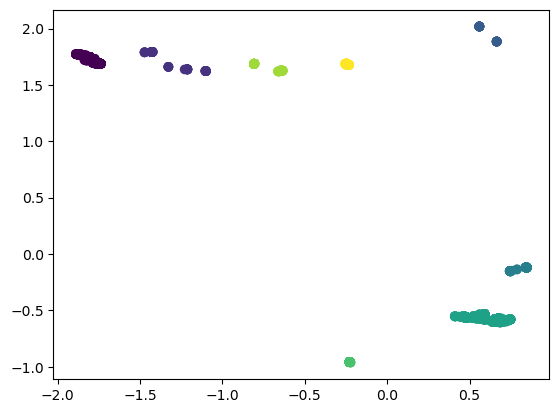

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # Pre-process the data before fitting as it requires to be scaled
scaled_lat = scaler.fit_transform(semantic_df[["Start Lat"]])
scaled_long = scaler.fit_transform(semantic_df[["Start Long"]])
scaled_latlng = pd.DataFrame(np.hstack((scaled_lat, scaled_long)), columns=["Lat", "Long"])

dbscan = DBSCAN(eps=0.2)
fit_pred_dbscan = dbscan.fit_predict(scaled_latlng) # Fit and cluster the data
plt.scatter(scaled_lat, scaled_long, c=fit_pred_dbscan);

In [ ]:
semantic_df["Cluster"] = pd.DataFrame(fit_pred_dbscan)
df = semantic_df[["Start Lat", "Start Long", "End Lat", "End Long", "Cluster"]].groupby(["Cluster"]).first().reset_index()

from geopy import Nominatim

geolocator = Nominatim(user_agent="personal_timeline")
loc = df.apply(lambda x: geolocator.reverse((x["Start Lat"], x["Start Long"]), exactly_one=True, language="en", zoom=3).address, axis=1) # Reverse geocode the lat and long to get the country
loc = pd.DataFrame(loc, columns=["Country"])
loc


,Country
0,Indonesia
1,Malaysia
2,South Korea
3,United States
4,United States
5,United States
6,Thailand
7,Vietnam


In [96]:
semantic_df = semantic_df.merge(loc, how="left", left_on="Cluster", right_index=True)
semantic_df

,startTime,endTime,timelinePath,activity.start.latLng,activity.end.latLng,Distance (m),activity.topCandidate.type,visit.topCandidate.placeId,visit.topCandidate.semanticType,Stops,Trip Duration (h),Date,Start Lat,Start Long,End Lat,End Long,Cluster,Country
0,2017-06-10 10:00:00+00:00,2017-06-10 12:00:00+00:00,"[{'point': '-6.2707362°, 107.1132758°', 'time'...",NaN,NaN,10666.48,NaN,NaN,NaN,6.0,2.00,2017-06-10,-6.270736,107.113276,-6.247948,107.019615,0,Indonesia
1,2017-06-10 22:19:23+00:00,2017-06-11 01:02:27+00:00,NaN,"-6.1798369°, 106.8789247°","-6.1792943°, 106.8696481°",2054.00,IN_PASSENGER_VEHICLE,NaN,NaN,0.0,2.72,2017-06-10,-6.179837,106.878925,-6.179294,106.869648,0,Indonesia
2,2017-06-10 17:27:59+00:00,2017-06-10 17:43:38+00:00,NaN,"-6.1804955°, 106.8901867°","-6.1803813°, 106.8882343°",216.00,IN_PASSENGER_VEHICLE,NaN,NaN,0.0,0.26,2017-06-10,-6.180496,106.890187,-6.180381,106.888234,0,Indonesia
3,2017-06-10 16:48:07+00:00,2017-06-10 17:12:19+00:00,NaN,"-6.1807332°, 106.8942526°","-6.1804955°, 106.8901867°",450.00,IN_PASSENGER_VEHICLE,NaN,NaN,0.0,0.40,2017-06-10,-6.180733,106.894253,-6.180496,106.890187,0,Indonesia
4,2017-06-10 15:38:22+00:00,2017-06-10 16:27:57+00:00,NaN,"-6.1812978°, 106.9039137°","-6.1808378°, 106.8960429°",871.00,IN_PASSENGER_VEHICLE,NaN,NaN,0.0,0.83,2017-06-10,-6.181298,106.903914,-6.180838,106.896043,0,Indonesia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15167,2025-04-10 19:00:00+00:00,2025-04-10 21:00:00+00:00,"[{'point': '34.0484394°, -118.4538126°', 'time...",NaN,NaN,2546.62,NaN,NaN,NaN,8.0,2.00,2025-04-10,34.048439,-118.453813,34.069361,-118.442454,4,United States
15168,2025-04-11 03:00:00+00:00,2025-04-11 05:00:00+00:00,"[{'point': '34.0483813°, -118.4538508°', 'time...",NaN,NaN,13.10,NaN,NaN,NaN,3.0,2.00,2025-04-11,34.048381,-118.453851,34.048499,-118.453841,4,United States
15169,2025-04-11 00:05:11+00:00,2025-04-11 00:30:14+00:00,NaN,"34.0711789°, -118.4421703°","34.0484489°, -118.4539038°",3521.55,CYCLING,NaN,NaN,0.0,0.42,2025-04-11,34.071179,-118.442170,34.048449,-118.453904,4,United States
15170,2025-04-11 00:30:14+00:00,2025-04-11 15:07:19+00:00,NaN,NaN,NaN,NaN,NaN,ChIJLWpdAWW7woAR3FqElBFsWds,HOME,0.0,NaN,2025-04-11,34.048497,-118.453810,34.048497,-118.453810,4,United States


### Transportation

Transporation data was pretty straightforward, but still a lot of missing data which I left to be NA. Here I just rename and clean up the original name to something more readable.

In [97]:
semantic_df.rename({"activity.topCandidate.type": "Transportation"}, axis=1, inplace=True)
semantic_df["Transportation"] = semantic_df["Transportation"].replace(["nan", "UNKNOWN_ACTIVITY_TYPE"], np.nan)
semantic_df["Transportation"] = semantic_df["Transportation"].replace(["IN_PASSENGER_VEHICLE", "MOTORCYCLING", "FLYING", "WALKING", "CYCLING", "IN_BUS", "IN_SUBWAY", "SKIING", "IN_FERRY", "IN_TRAIN"], 
                                                                      ["Car", "Motorcycle", "Plane", "Walking", "Bike", "Bus", "Subway", "Skiing", "Ferry", "Train"])
semantic_df

,startTime,endTime,timelinePath,activity.start.latLng,activity.end.latLng,Distance (m),Transportation,visit.topCandidate.placeId,visit.topCandidate.semanticType,Stops,Trip Duration (h),Date,Start Lat,Start Long,End Lat,End Long,Cluster,Country
0,2017-06-10 10:00:00+00:00,2017-06-10 12:00:00+00:00,"[{'point': '-6.2707362°, 107.1132758°', 'time'...",NaN,NaN,10666.48,NaN,NaN,NaN,6.0,2.00,2017-06-10,-6.270736,107.113276,-6.247948,107.019615,0,Indonesia
1,2017-06-10 22:19:23+00:00,2017-06-11 01:02:27+00:00,NaN,"-6.1798369°, 106.8789247°","-6.1792943°, 106.8696481°",2054.00,Car,NaN,NaN,0.0,2.72,2017-06-10,-6.179837,106.878925,-6.179294,106.869648,0,Indonesia
2,2017-06-10 17:27:59+00:00,2017-06-10 17:43:38+00:00,NaN,"-6.1804955°, 106.8901867°","-6.1803813°, 106.8882343°",216.00,Car,NaN,NaN,0.0,0.26,2017-06-10,-6.180496,106.890187,-6.180381,106.888234,0,Indonesia
3,2017-06-10 16:48:07+00:00,2017-06-10 17:12:19+00:00,NaN,"-6.1807332°, 106.8942526°","-6.1804955°, 106.8901867°",450.00,Car,NaN,NaN,0.0,0.40,2017-06-10,-6.180733,106.894253,-6.180496,106.890187,0,Indonesia
4,2017-06-10 15:38:22+00:00,2017-06-10 16:27:57+00:00,NaN,"-6.1812978°, 106.9039137°","-6.1808378°, 106.8960429°",871.00,Car,NaN,NaN,0.0,0.83,2017-06-10,-6.181298,106.903914,-6.180838,106.896043,0,Indonesia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15167,2025-04-10 19:00:00+00:00,2025-04-10 21:00:00+00:00,"[{'point': '34.0484394°, -118.4538126°', 'time...",NaN,NaN,2546.62,NaN,NaN,NaN,8.0,2.00,2025-04-10,34.048439,-118.453813,34.069361,-118.442454,4,United States
15168,2025-04-11 03:00:00+00:00,2025-04-11 05:00:00+00:00,"[{'point': '34.0483813°, -118.4538508°', 'time...",NaN,NaN,13.10,NaN,NaN,NaN,3.0,2.00,2025-04-11,34.048381,-118.453851,34.048499,-118.453841,4,United States
15169,2025-04-11 00:05:11+00:00,2025-04-11 00:30:14+00:00,NaN,"34.0711789°, -118.4421703°","34.0484489°, -118.4539038°",3521.55,Bike,NaN,NaN,0.0,0.42,2025-04-11,34.071179,-118.442170,34.048449,-118.453904,4,United States
15170,2025-04-11 00:30:14+00:00,2025-04-11 15:07:19+00:00,NaN,NaN,NaN,NaN,NaN,ChIJLWpdAWW7woAR3FqElBFsWds,HOME,0.0,NaN,2025-04-11,34.048497,-118.453810,34.048497,-118.453810,4,United States


## Data Export

Lastly, dropping some features that are already extracted and export the data as csv to be used in Tableau. I included an extra `index` column for visualization purposes.

In [98]:
# Drop extra columns
semantic_df.drop(["timelinePath", "activity.start.latLng", "activity.end.latLng", "visit.topCandidate.semanticType", "endTime", "startTime", "visit.topCandidate.placeId"], axis=1, inplace=True)

In [ ]:
semantic_df = semantic_df[["Date", "Distance (m)", "Trip Duration (h)", "Stops", "Transportation", "Start Lat", "Start Long", "End Lat", "End Long", "Country"]] # Rearrange DataFrame
semantic_df

,Date,Distance (m),Trip Duration (h),Stops,Transportation,Start Lat,Start Long,End Lat,End Long,Country
0,2017-06-10,10666.48,2.00,6.0,NaN,-6.270736,107.113276,-6.247948,107.019615,Indonesia
1,2017-06-10,2054.00,2.72,0.0,Car,-6.179837,106.878925,-6.179294,106.869648,Indonesia
2,2017-06-10,216.00,0.26,0.0,Car,-6.180496,106.890187,-6.180381,106.888234,Indonesia
3,2017-06-10,450.00,0.40,0.0,Car,-6.180733,106.894253,-6.180496,106.890187,Indonesia
4,2017-06-10,871.00,0.83,0.0,Car,-6.181298,106.903914,-6.180838,106.896043,Indonesia
...,...,...,...,...,...,...,...,...,...,...
15167,2025-04-10,2546.62,2.00,8.0,NaN,34.048439,-118.453813,34.069361,-118.442454,United States
15168,2025-04-11,13.10,2.00,3.0,NaN,34.048381,-118.453851,34.048499,-118.453841,United States
15169,2025-04-11,3521.55,0.42,0.0,Bike,34.071179,-118.442170,34.048449,-118.453904,United States
15170,2025-04-11,NaN,NaN,0.0,NaN,34.048497,-118.453810,34.048497,-118.453810,United States


In [ ]:
semantic_df.reset_index() # Include extra index for viz purposes

,index,Date,Distance (m),Trip Duration (h),Stops,Transportation,Start Lat,Start Long,End Lat,End Long,Country
0,0,2017-06-10,10666.48,2.00,6.0,NaN,-6.270736,107.113276,-6.247948,107.019615,Indonesia
1,1,2017-06-10,2054.00,2.72,0.0,Car,-6.179837,106.878925,-6.179294,106.869648,Indonesia
2,2,2017-06-10,216.00,0.26,0.0,Car,-6.180496,106.890187,-6.180381,106.888234,Indonesia
3,3,2017-06-10,450.00,0.40,0.0,Car,-6.180733,106.894253,-6.180496,106.890187,Indonesia
4,4,2017-06-10,871.00,0.83,0.0,Car,-6.181298,106.903914,-6.180838,106.896043,Indonesia
...,...,...,...,...,...,...,...,...,...,...,...
15167,15167,2025-04-10,2546.62,2.00,8.0,NaN,34.048439,-118.453813,34.069361,-118.442454,United States
15168,15168,2025-04-11,13.10,2.00,3.0,NaN,34.048381,-118.453851,34.048499,-118.453841,United States
15169,15169,2025-04-11,3521.55,0.42,0.0,Bike,34.071179,-118.442170,34.048449,-118.453904,United States
15170,15170,2025-04-11,NaN,NaN,0.0,NaN,34.048497,-118.453810,34.048497,-118.453810,United States


In [ ]:
# Data from 2022/2023 above is more consistent
semantic_df.to_csv("personal_maps_timeline.csv") # export